In [1]:
import pandas as pd
import sklearn
import itertools
import numpy as np
import seaborn as sb
import re
import nltk
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
#data collection
#loading dataset into pandas dataframe
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [4]:
#deleting unwanted columns
train_df = train_df.drop("author", axis = 1)
train_df = train_df.drop("title", axis = 1)
train_df = train_df.drop("id", axis = 1)

In [5]:
train_df.shape

(20800, 2)

In [6]:
train_df.head(10)

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
5,"In these trying times, Jackie Mason is the Voi...",0
6,Ever wonder how Britain’s most iconic pop pian...,1
7,"PARIS — France chose an idealistic, traditi...",0
8,Donald J. Trump is scheduled to make a highly ...,0
9,A week before Michael T. Flynn resigned as nat...,0


In [7]:
train_df.isna().sum()

text     39
label     0
dtype: int64

<Axes: xlabel='label', ylabel='count'>

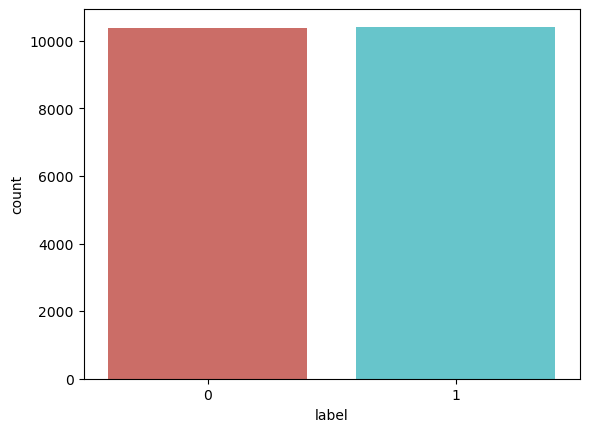

In [8]:
def create_distribution(dataFile):
    return sb.countplot(x='label', data=dataFile, palette='hls')

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(train_df)

In [9]:
def data_qualityCheck():
    print("Checking data qualitites...")
    train_df.isnull().sum()
    train_df.info()  
    print("check finished.")
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20761 non-null  object
 1   label   20800 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 325.1+ KB
check finished.


In [10]:
train_df = train_df.dropna()

In [11]:
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
Index: 20761 entries, 0 to 20799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20761 non-null  object
 1   label   20761 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 486.6+ KB
check finished.


In [12]:
train_df.shape

(20761, 2)

In [13]:
train_df.head(10)

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
5,"In these trying times, Jackie Mason is the Voi...",0
6,Ever wonder how Britain’s most iconic pop pian...,1
7,"PARIS — France chose an idealistic, traditi...",0
8,Donald J. Trump is scheduled to make a highly ...,0
9,A week before Michael T. Flynn resigned as nat...,0


In [14]:
train_df.reset_index(drop= True,inplace=True)

In [15]:
train_df.head(10)

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
5,"In these trying times, Jackie Mason is the Voi...",0
6,Ever wonder how Britain’s most iconic pop pian...,1
7,"PARIS — France chose an idealistic, traditi...",0
8,Donald J. Trump is scheduled to make a highly ...,0
9,A week before Michael T. Flynn resigned as nat...,0


In [16]:
label_train = train_df.label

In [17]:
label_train.head(10)

0    1
1    0
2    1
3    1
4    1
5    0
6    1
7    0
8    0
9    0
Name: label, dtype: int64

In [18]:
train_df = train_df.drop("label", axis = 1)

In [19]:
train_df.head(10)

,text
0,House Dem Aide: We Didn’t Even See Comey’s Let...
1,Ever get the feeling your life circles the rou...
2,"Why the Truth Might Get You Fired October 29, ..."
3,Videos 15 Civilians Killed In Single US Airstr...
4,Print \nAn Iranian woman has been sentenced to...
5,"In these trying times, Jackie Mason is the Voi..."
6,Ever wonder how Britain’s most iconic pop pian...
7,"PARIS — France chose an idealistic, traditi..."
8,Donald J. Trump is scheduled to make a highly ...
9,A week before Michael T. Flynn resigned as nat...


In [20]:
train_df['text'][2188]

'\nThis article was written by John Vibes and originally published at Activist Post.com . \nEditor’s Comment: On the surface, there are good intentions here. The Bushes, like other patriotic establishment figures, always honor the troops, and count the sacrifices. Typically, they are stoic and praiseworthy of everything the military does. But underneath the surface, one has to wonder what is really going on inside the disturbed mind of George W. Bush – whose orders for an illegal war in Iraq, and a broader War on Terror in Afghanistan and elsewhere resulted in the deaths of thousands of U.S. troops, tens of thousands of wounded or injured and potentially more than a million civilians dead. \nDoes he feel remorse? Guilt? Has he admitted to his personal responsibility for what happened to their lives? Or do his paintings reveal a morbid sense of power over the lives of men and women whom he can only reflect upon and humanize after the fact? Considering that the Iraq war was based upon a 

In [21]:
lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english'))

In [22]:
stpwrds

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
#lemmatization
for x in range(len(train_df)) :
    corpus = []
    review = train_df['text'][x]
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))
    review = ' '.join(corpus)
    train_df['text'][x] = review      

In [24]:
train_df['text'][2182]

'comment actor steven seagal stood america rest hollywood remains silent week rough country first democratic nominee hillary clinton collapsed memorial called million hardworking american deplorable werent enough nfl player throughout country blatantly disrespecting american flag needle say seagal enough think important job secretary state ensuring people dont get killed seagal tweeted cant email protected pneumonia going disastrous american people notohillary continued course seagal quickly became target liberal fire comment refused break particularly lost one twitter user tried argued hillary capable presidency capable capable leaving american die capable disregarding law capable disrespecting rape survivor argued went address race relation united state true role president barack obama played social evolution country obama abysmal race relation usa truth need start honest dialog wrote seagal concluded pointing irony attack receiving liberal everywhere best thing worldmaking one state

In [25]:
#splitting the dataset to training and test dataset,80% data to be training data &20% will be testing data.(ie test_size=0.2)
X_train, X_test, Y_train, Y_test = train_test_split(train_df['text'], label_train, test_size=0.2, random_state=0)

In [26]:
X_train

11948    atlanta report written notebook paper elementa...
5370     naming trump nigel farage britain marine le pe...
1179     merkel say facebook google distort perception ...
15032    germany somali muslim dont pay wabern hesse gr...
13850    hillary clinton fbi real november surprise pep...
                               ...                        
13123    share facebook dont know fall one favorite sea...
19648    berkeley student argues free speech put studen...
9845     justice neil gorsuch seated supreme court unit...
10799    leave reply bill still good morning im still r...
2732     posted eddie toy r u store uk offering quiet h...
Name: text, Length: 16608, dtype: object

In [27]:
X_train.shape

(16608,)

In [28]:
Y_train

11948    0
5370     1
1179     1
15032    1
13850    1
        ..
13123    1
19648    0
9845     0
10799    1
2732     1
Name: label, Length: 16608, dtype: int64

In [29]:
#converting to textual data into numerical data/feature vector

tfidf_v = TfidfVectorizer()
tfidf_X_train = tfidf_v.fit_transform(X_train)
tfidf_X_test = tfidf_v.transform(X_test)

In [30]:
print(tfidf_X_train,tfidf_X_test)

  (0, 35432)	0.02434414318862491
  (0, 24691)	0.018716701868941005
  (0, 55517)	0.047139515711581106
  (0, 84179)	0.049927296086982695
  (0, 122591)	0.030536816910367304
  (0, 97490)	0.046316491936235875
  (0, 34353)	0.04432412776392161
  (0, 64655)	0.02920338022885307
  (0, 48521)	0.02617255051508571
  (0, 26729)	0.03585329443623728
  (0, 143706)	0.01075010566703517
  (0, 6643)	0.03660140894776423
  (0, 37070)	0.03786588551009282
  (0, 30322)	0.023121683533403856
  (0, 42593)	0.019943857478103705
  (0, 21881)	0.019835642218410002
  (0, 24894)	0.03772095397686807
  (0, 67132)	0.01889565149775918
  (0, 128821)	0.034133740548852654
  (0, 101331)	0.024321341739502077
  (0, 57704)	0.03441278398911631
  (0, 105094)	0.01733730161490273
  (0, 109596)	0.027106846258912746
  (0, 36757)	0.025460546184162047
  (0, 3157)	0.03544776294486961
  :	:
  (16607, 13693)	0.025726913680138172
  (16607, 77368)	0.019134230195348306
  (16607, 32721)	0.04534606258782239
  (16607, 38225)	0.025430037331321476
  

In [31]:
tfidf_X_train.shape

(16608, 146627)

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [33]:
#model and model training

classifier = PassiveAggressiveClassifier()
classifier.fit(tfidf_X_train,Y_train)

PassiveAggressiveClassifier()

Accuracy: 95.55%
Confusion matrix, without normalization


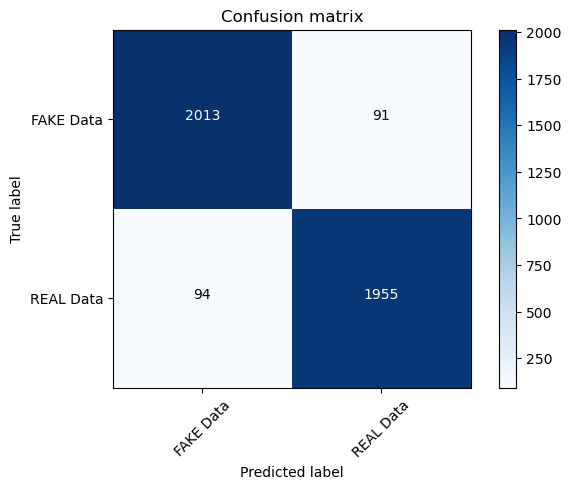

In [34]:
#accuracy score on the test data
Y_pred = classifier.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [35]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2104
           1       0.96      0.95      0.95      2049

    accuracy                           0.96      4153
   macro avg       0.96      0.96      0.96      4153
weighted avg       0.96      0.96      0.96      4153



In [36]:
#pickling the model into disk
pickle.dump(classifier,open('./model.pkl', 'wb'))
pickle.dump(tfidf_v,open('vector.pkl', 'wb'))

In [37]:
# load the model from disk
loaded_model = pickle.load(open('./model.pkl', 'rb'))
#vector_form = pickle.load(open('vector.pkl', 'rb'))

In [38]:
def fake_news_det(news):
    review = news
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    corpus = []
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))     
    input_data = [' '.join(corpus)]
    vectorized_input_data = tfidf_v.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    if prediction[0] == 1:
        print("Prediction of the News :  Looking Fake⚠ News📰 ")
    else:
        print("Prediction of the News : Looking Real News📰 ")

In [39]:
X_test

9383     jerusalem mr president woman called waad qanna...
1471     milo upcoming book dangerous jumped number one...
4480     new delhi india rapidly worsening air pollutio...
17543    nothing presidential dignified sense ruling cl...
775      thursday republican senator ted cruz lindsey g...
                               ...                        
11562    cairo one egypt highest court overturned death...
18758    bill congress could make harder worker keep em...
19925    email rebutting justice department assertion g...
16765    used need million become customer goldman sach...
16236    washington conn television writer named amy va...
Name: text, Length: 4153, dtype: object

In [40]:
X_test[16236]

'washington conn television writer named amy vacationed mayflower grace inn built high hill true hollywood fashion m returned hometown los angeles brief visit spun star hollow charming new england small town resident troubadour star hollow would become setting gilmore girl cultishly popular dramedy ran seven season wb later cw last weekend fan woman many mother daughter descended rural town western connecticut population first gilmore girl fan fest come oklahoma minnesota far away brazil paid much per ticket see real star hollow meet actor play resident way wanted impossible experience waking life dream town built studio backlot star hollow instance would chilly pouring rain community green would become mud field would gazebo center town something washington depot one village within town conspicuously lack faced reality attendee cheerily persevered stood holding umbrella line stretched clear door hickory stick bookshop get signed copy cookbook eat like gilmore kristi carlson queued dro

In [41]:
Y_test[16236]

0

In [42]:
news=str(input("Enter the News:"))
fake_news_det(news)

Enter the News: They are all "Treasonous" lying, narcissistical, sociopathic bastards!....When Trump say's they need to 'drain the swamp' or whatever?...he's not wrong, but who's going to have he's back when he's dredging the filth out of the swamp that is political Washington and all the corporate 'skid marks' along with the corrupt Bankster's and especially the FED reserve?....Who?.


Prediction of the News :  Looking Fake⚠ News📰 


In [43]:
print(tfidf_X_test)

  (0, 145280)	0.01844485042315303
  (0, 144977)	0.015457223015016446
  (0, 144768)	0.01911901451687839
  (0, 143706)	0.028060172274612872
  (0, 143638)	0.024905915684327463
  (0, 143556)	0.01244170261947782
  (0, 143502)	0.019148889523576598
  (0, 143491)	0.013092368332658798
  (0, 143287)	0.04511429878308437
  (0, 142833)	0.023637874719774573
  (0, 142711)	0.0181873427306572
  (0, 142467)	0.04091638686359329
  (0, 141751)	0.07891909883724228
  (0, 141250)	0.025515809871510045
  (0, 141111)	0.02754047462384038
  (0, 140999)	0.011672969609599109
  (0, 140517)	0.05100841770153681
  (0, 140096)	0.2322877037524493
  (0, 139880)	0.01863696975472698
  (0, 139865)	0.02266196492783703
  (0, 139853)	0.18401013974608527
  (0, 139704)	0.05170769876148053
  (0, 139298)	0.021476785329047655
  (0, 139014)	0.02642011645012094
  (0, 138932)	0.057786029065867724
  :	:
  (4152, 8924)	0.037011585724563166
  (4152, 8761)	0.02828462364268078
  (4152, 8756)	0.022822956743646816
  (4152, 8143)	0.022419554822

In [44]:
print(Y_test)

9383     0
1471     0
4480     0
17543    1
775      0
        ..
11562    0
18758    0
19925    1
16765    0
16236    0
Name: label, Length: 4153, dtype: int64


In [45]:
X_new=tfidf_X_test[3]
prediction = loaded_model.predict(X_new)

if (prediction[0] == 1):
	print("Prediction of the News :  Looking Fake⚠ News📰 ")
else:
	print("Prediction of the News : Looking Real News📰 ")

Prediction of the News :  Looking Fake⚠ News📰 


In [46]:
print(Y_test[17543])

1


In [47]:
!pip install transformers

In [96]:
#splitting the dataset to training and test dataset,80% data to be training data &20% will be testing data.(ie test_size=0.2)
X_train, X_test, Y_train, Y_test = train_test_split(train_df['text'], label_train, test_size=0.2, random_state=0)

In [104]:
#model and model training

classifier = DecisionTreeClassifier()
classifier.fit(tfidf_X_train,Y_train)

DecisionTreeClassifier()

Accuracy: 88.15%
Confusion matrix, without normalization


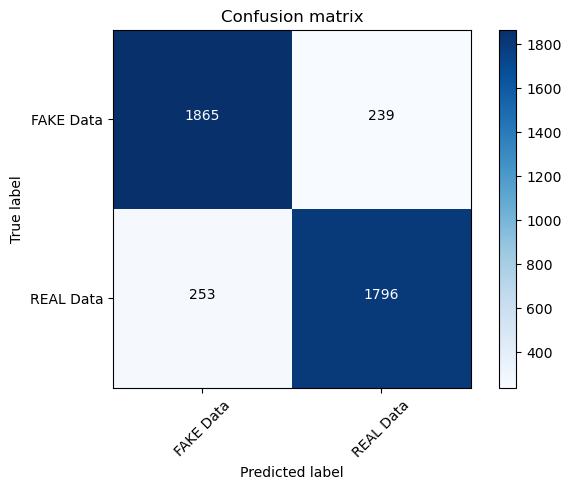

In [106]:
#accuracy score on the test data
Y_pred = classifier.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [108]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2104
           1       0.88      0.88      0.88      2049

    accuracy                           0.88      4153
   macro avg       0.88      0.88      0.88      4153
weighted avg       0.88      0.88      0.88      4153



In [114]:
#model and model training
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(tfidf_X_train,Y_train)

RandomForestClassifier()

Accuracy: 90.73%
Confusion matrix, without normalization


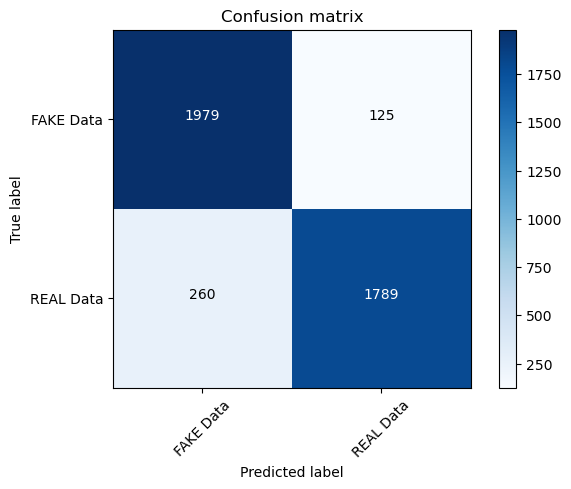

In [116]:
#accuracy score on the test data
Y_pred = classifier.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [118]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2104
           1       0.93      0.87      0.90      2049

    accuracy                           0.91      4153
   macro avg       0.91      0.91      0.91      4153
weighted avg       0.91      0.91      0.91      4153

